**Loan Status Prediction**

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


{'train_ctrUa4K.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urb

**Data Exploration**

In [ ]:
train_data = pd.read_csv('train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.shape

(614, 13)

In [77]:
train_data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Relation of Loan Amount and Loan Status

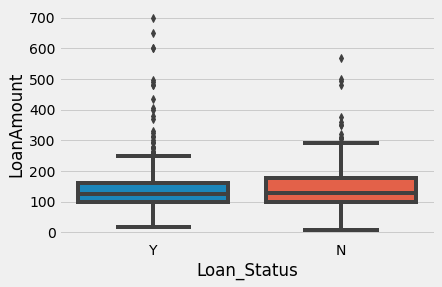

In [ ]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_data)

Loan Term and Loan Status

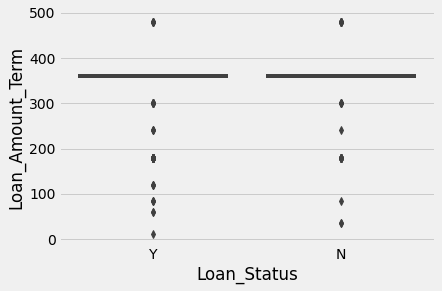

In [ ]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=train_data)

Property Area and Loan Status

In [ ]:
train_data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

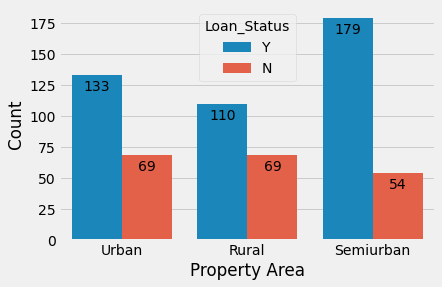

In [ ]:
fig, ax = plt.subplots();
splot = sns.countplot(x='Property_Area', hue='Loan_Status', data=train_data, ax=ax);
ax.set_xlabel('Property Area');
ax.set_ylabel('Count');
for p in splot.patches:
    splot.annotate(format(p.get_height(), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points');
plt.savefig('PropertyArea_LoanStatus_bar.png');

Income and Loan Status

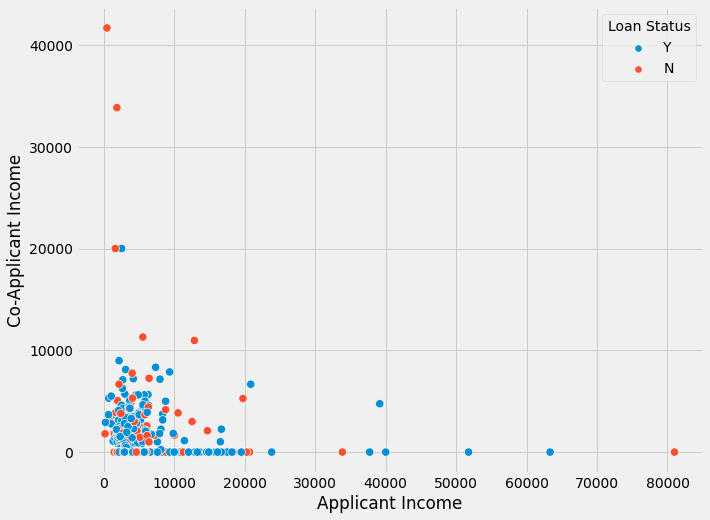

In [ ]:
fig, ax=plt.subplots(figsize=(10,8));
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status', data=train_data, s=70);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Co-Applicant Income');
ax.legend(title='Loan Status', fontsize = 'medium');

In [ ]:
import copy
df1 = train_data.copy(deep=True)
df1['TotalIncome'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']

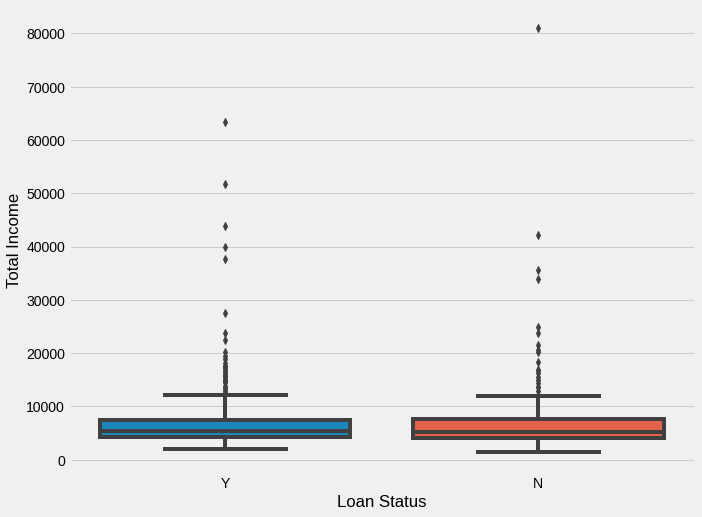

In [ ]:
fig,ax=plt.subplots(figsize=(10,8));
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df1);
ax.set_xlabel('Loan Status');
ax.set_ylabel('Total Income');
style.use('seaborn');

In [ ]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train_data.Gender.unique()
train_data.Gender.value_counts()

array(['Male', 'Female', nan], dtype=object)

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train_data.Married.unique()
train_data.Married.value_counts()

array(['No', 'Yes', nan], dtype=object)

Yes    398
No     213
Name: Married, dtype: int64

['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


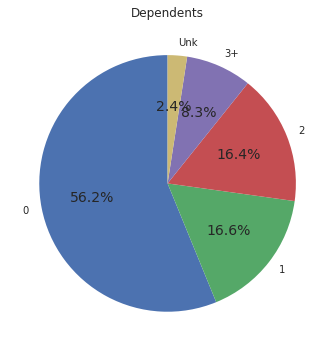

In [ ]:
print(train_data.Dependents.unique())
print(train_data.Dependents.value_counts())
plt.pie([345,102,101,51,15],labels=["0","1","2","3+",'Unk'], autopct='%1.1f%%',startangle=90);
plt.title("Dependents");
sns.set(font_scale=1.0);

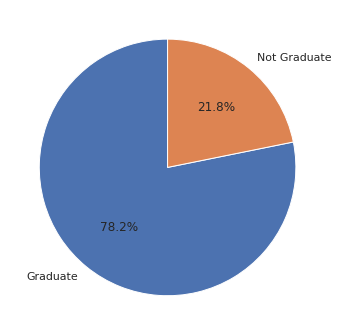

In [ ]:
train_data.Education.unique()
train_data.Education.value_counts()
plt.pie([480,134],labels=['Graduate','Not Graduate'], autopct='%1.1f%%',startangle=90);

In [ ]:
loan_yes = train_data[train_data['Loan_Status']=='Y']
loan_no = train_data[train_data['Loan_Status']=='N']
edu_yes = train_data[train_data['Education']=='Graduate']
edu_no = train_data[train_data['Education']=='Not Graduate']

grad_loan = train_data[(train_data['Loan_Status']=='Y')&(train_data['Education']=='Graduate')]['Loan_ID'].count()
grad_noloan = train_data[(train_data['Loan_Status']=='N')&(train_data['Education']=='Graduate')]['Loan_ID'].count()
notgrad_loan = train_data[(train_data['Loan_Status']=='Y')&(train_data['Education']=='Not Graduate')]['Loan_ID'].count()
notgrad_noloan = train_data[(train_data['Loan_Status']=='N')&(train_data['Education']=='Not Graduate')]['Loan_ID'].count()

print('Graduate + Loan', grad_loan, '; ', round(grad_loan/(grad_loan+grad_noloan)*100,2),'% of Graduates got Loan')
print('Graduate + No Loan', grad_noloan)
print('Not Graduate + Loan', notgrad_loan,'; ', round(notgrad_loan/(notgrad_loan+notgrad_noloan)*100,2),'% of Not Graduates got Loan')



Graduate + Loan 340 ;  70.83 % of Graduates got Loan
Graduate + No Loan 140
Not Graduate + Loan 82 ;  61.19 % of Not Graduates got Loan


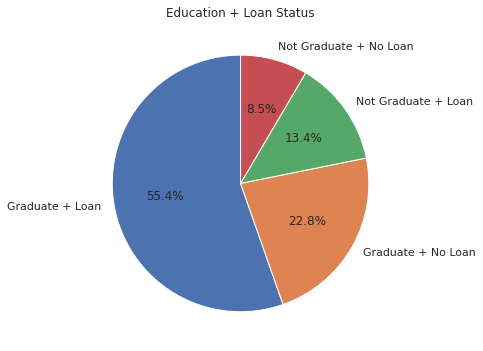

In [ ]:
plt.pie([340,140,82,52],labels=["Graduate + Loan","Graduate + No Loan","Not Graduate + Loan","Not Graduate + No Loan"], autopct='%1.1f%%',startangle=90);
plt.title("Education + Loan Status");
sns.set(font_scale=1.0);

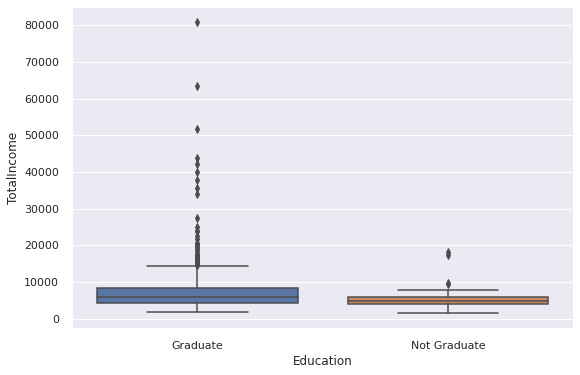

In [ ]:
sns.boxplot(x='Education', y='TotalIncome', data=df1)

In [ ]:
train_data.Self_Employed.unique()
train_data.Self_Employed.value_counts()

array(['No', 'Yes', nan], dtype=object)

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train_data.Property_Area.unique()
train_data.Property_Area.value_counts()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
print(f'Percentage of People with Credit History: {round(df[df.Credit_History==1].shape[0]/df.shape[0]*100,2)}%').Loan_Status.unique()
train_data.Loan_Status.value_counts()

array(['Y', 'N'], dtype=object)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
print(f'Percentage of People with Credit History: {round(train_data[train_data.Credit_History==1].shape[0]/train_data.shape[0]*100,2)}%')

Percentage of People with Credit History: 77.36%


In [ ]:
train_data.Credit_History = train_data.Credit_History.fillna(0)
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
filter2 = (train_data.Credit_History==1) & (train_data.Loan_Status=='Y')
print(f'Percentage of People with Loan AND Credit History: {round(train_data[filter2].shape[0]/train_data.shape[0]*100,2)}%')

Percentage of People with Loan AND Credit History: 61.56%


In [ ]:
filter2 = (train_data.Credit_History==0) & (train_data.Loan_Status=='Y')
print(f'Percentage of People with Loan WITHOUT Credit History: {round(train_data[filter2].shape[0]/train_data.shape[0]*100,2)}%')

Percentage of People with Loan WITHOUT Credit History: 7.17%


In [ ]:
filter2 = (train_data.Credit_History==0) & (train_data.Loan_Status=='N')
print(f'Percentage of People WITHOUT Loan WITHOUT Credit History: {round(train_data[filter2].shape[0]/train_data.shape[0]*100,2)}%')

Percentage of People WITHOUT Loan WITHOUT Credit History: 15.47%


In [ ]:
filter2 = (train_data.Credit_History==1) & (train_data.Loan_Status=='N')
print(f'Percentage of People WITHOUT Loan with Credit History: {round(train_data[filter2].shape[0]/train_data.shape[0]*100,2)}%')

Percentage of People WITHOUT Loan with Credit History: 15.8%


Distribution of various variables

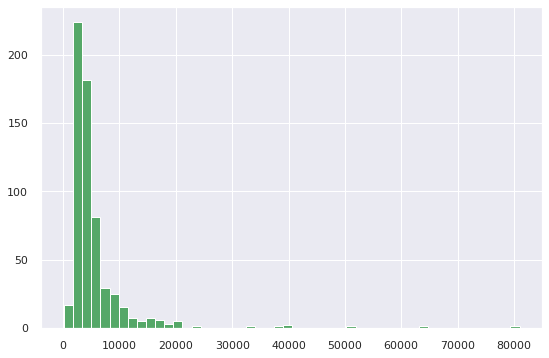

In [ ]:
plt.hist(x="ApplicantIncome", data=train_data, bins=50, color='g');

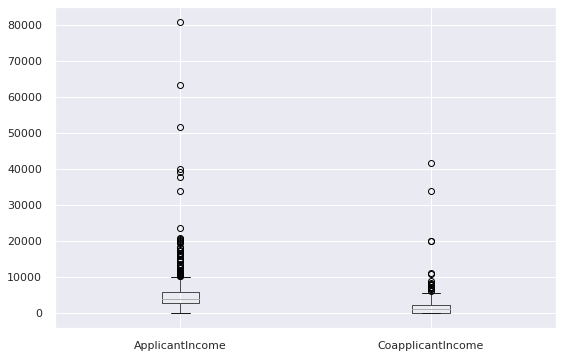

In [ ]:
train_data[['ApplicantIncome','CoapplicantIncome']].boxplot();

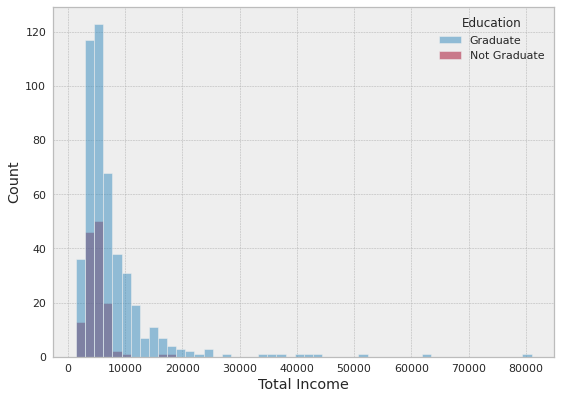

In [ ]:
import copy
df1 = train_data.copy(deep=True)
df1['TotalIncome'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
f, ax = plt.subplots(figsize=(8, 6));
#ax.hist(df2['TotalIncome'], 20, histtype='bar', color='b', label=df2['Education'][0]);
#ax.hist(df2['TotalIncome'], 20, histtype='bar', color='r', label=df2['Education'][1]);
#sns.color_palette("Paired");
style.use('bmh')
sns.histplot(data=df1, x='TotalIncome', hue='Education', stat='count', bins=50, legend=True, ax=ax);
ax.set_xlabel('Total Income');

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


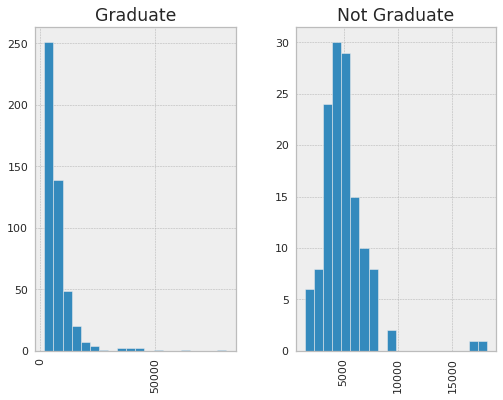

In [ ]:
f, ax = plt.subplots(figsize=(8, 6));
df1.hist(column='TotalIncome', by='Education', bins=20, ax=ax);
sns.set(font_scale=2);

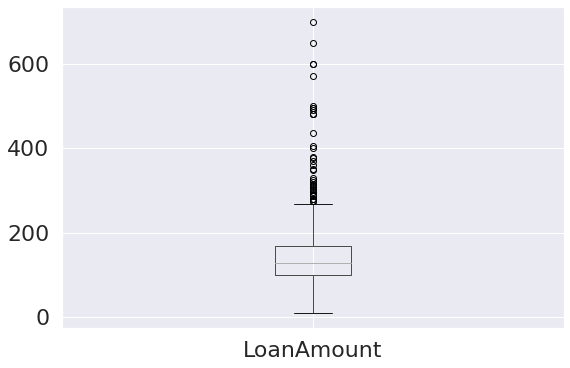

In [ ]:
train_data.boxplot(column=['LoanAmount']);

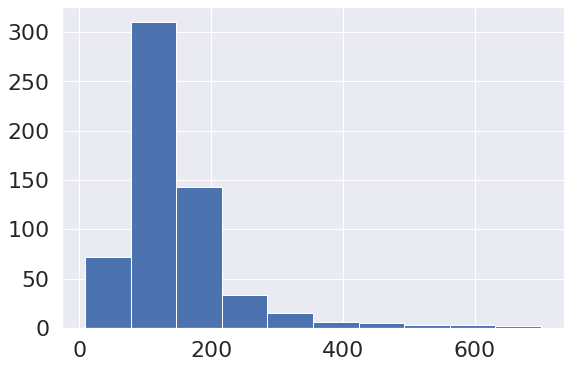

In [ ]:
train_data.LoanAmount.hist();

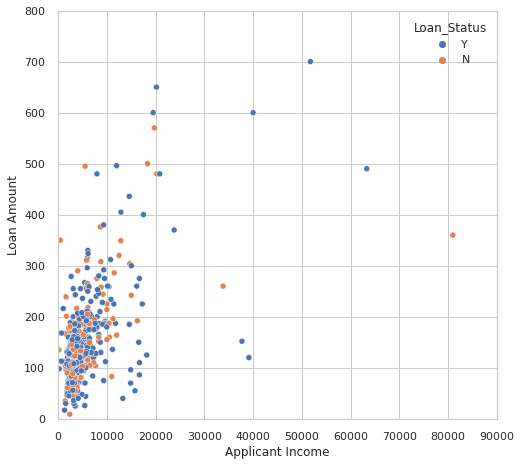

In [ ]:
sns.set_theme(style="whitegrid");
f, ax = plt.subplots(figsize=(7, 7));
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_data, ax=ax);
ax.set_xlim(0,90000);
ax.set_ylim(0,800);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Loan Amount');

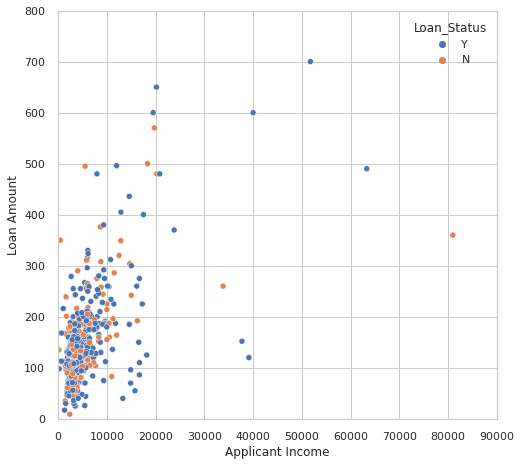

In [ ]:
sns.set_theme(style="whitegrid");
f, ax = plt.subplots(figsize=(7, 7));
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_data, ax=ax);
ax.set_xlim(0,90000);
ax.set_ylim(0,800);
ax.set_xlabel('Applicant Income');
ax.set_ylabel('Loan Amount');

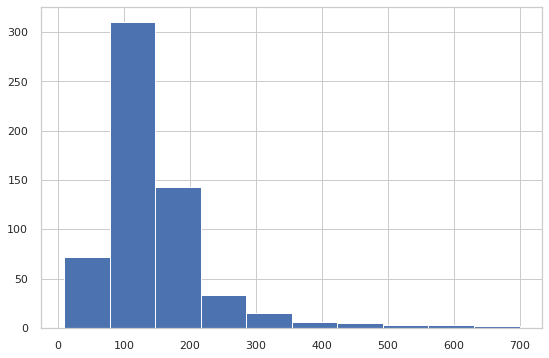

In [ ]:
train_data.LoanAmount.hist();

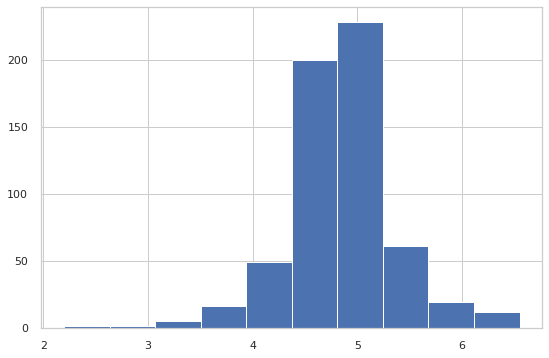

In [ ]:
train_data.LoanAmount = train_data.LoanAmount.apply(np.log)
train_data.LoanAmount.hist();

In [ ]:
#train_data['TotalIncome'] = train_data.ApplicantIncome + train_data.CoapplicantIncome
#train_data.TotalIncome = train_data.TotalIncome.apply(np.log)
#train_data.head()

In [ ]:
train_data.shape
train_data.info()

(614, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Modelling

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

In [3]:
from google.colab import files
files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


{'train_ctrUa4K.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urb

In [4]:
train_data = pd.read_csv('train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
cat_feats = train_data.dtypes[train_data.dtypes == 'object'].index.tolist()
num_feats = train_data.dtypes[~train_data.dtypes.index.isin(cat_feats)].index.tolist()

In [6]:
for col in cat_feats:
    train_data[col] = train_data[col].astype('category')
    
cat_feats.remove('Loan_Status') # since this will not be a feature
cat_feats.remove("Loan_ID") # since this is not needed for the model

In [7]:
X = train_data.drop(columns=['Loan_Status','Loan_ID'])
y = train_data['Loan_Status']

from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
from sklearn.pipeline import Pipeline, FeatureUnion
# numerical preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
# categorical preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
# models?
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

In [9]:
# create new column given df
def totalIncome(dataset):
    dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
    return dataset

# allow function transformation on df column
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

# log transform given columns
def LogTransform(dataset):
    dataset = dataset.assign(log_TotalIncome = np.log1p(dataset['TotalIncome']))
    dataset = dataset.assign(log_LoanAmount = np.log1p(dataset['LoanAmount']))
    dataset = dataset.drop(columns=['TotalIncome','LoanAmount'])
    #    dataset['TotalIncome'].assign() = dataset['TotalIncome'].apply(np.log)
#    dataset['LoanAmount'] = dataset['LoanAmount'].apply(np.log)
    return dataset

# don't forget ToDenseTransformer after one hot encoder
class ToDenseTransformer():
    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()
    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

# select specific columns to perform pipeline onto
class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X[self.columns].copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

In [10]:
# NUMERICAL --> select k best columns to be tuned later
## different columns need different NaN treatments
nullnumTransform = ColumnTransformer([
    ('impute_zero', SimpleImputer(strategy='constant', fill_value=0), ['Credit_History','log_LoanAmount']), # if empty, assume not-applicable = 'No'
    ('impute_mean', SimpleImputer(strategy='mean'), ['Loan_Amount_Term'])], remainder='passthrough') # assume average loan information if not given
## scale other columns; do not need treatment for 0/1 columns like Credit_History
scalerTransform = ColumnTransformer([('std_scaler', StandardScaler(), [0,1,2])], remainder='passthrough')
## put numerical pre-processing together
numerical = Pipeline([
    ('totalincome', DataframeFunctionTransformer(totalIncome)),
    ('logtransform', DataframeFunctionTransformer(LogTransform)),
    ('selector', SelectColumnsTransformer(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History','log_TotalIncome','log_LoanAmount'])),
    ('null_fill', nullnumTransform),
    ('standard_scaler', scalerTransform),
    ('kbest', SelectKBest(k=3))])

# CATEGORICAL --> PCA 3 components to be tuned later
## different columns need different NaN treatments
nullcatTransform = ColumnTransformer([
    ('impute_no', SimpleImputer(strategy='constant', fill_value='No'), ['Married','Self_Employed']), # if empty, assume not-applicable = 'No'
    ('impute_zero', SimpleImputer(strategy='constant', fill_value='0'), ['Dependents']), # needs to be string of numbers: '0', '1', '2' or '3+'
    ('impute_mode', SimpleImputer(strategy='most_frequent'), ['Gender'])], remainder='passthrough') # no way to otherwise tell, give most common gender back
## put categorical pre-processing together
categorical = Pipeline([
    ('selector', SelectColumnsTransformer(cat_feats)),
    ('null_fill', nullcatTransform),
    ('encode', OneHotEncoder()),
    ('to_dense',ToDenseTransformer()),
    ('pca', PCA(n_components=3))])

# define which transformer applies to which columns
preprocess = FeatureUnion([
    ('categorical', categorical),
    ('numerical', numerical)])

In [11]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression())])

In [12]:
from sklearn import set_config
set_config(display='diagram')
pipeline.fit(X_train, y_train)
print("model score: %.2f%%" % (pipeline.score(X_test, y_test)*100))

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('categorical',
                                                 Pipeline(steps=[('selector',
                                                                  <__main__.SelectColumnsTransformer object at 0x7f6d46b425b0>),
                                                                 ('null_fill',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('impute_no',
                                                                                                   SimpleImputer(fill_value='No',
                                                                                                                 strategy='constant'),
                                                                                                   ['Married',
                                                                                                    'Self_Employed']),
                                                                                                  ('impute_zero',
                                                                                                   SimpleImpu...
                                                                                    transformers=[('impute_zero',
                                                                                                   SimpleImputer(fill_value=0,
                                                                                                                 strategy='constant'),
                                                                                                   ['Credit_History',
                                                                                                    'log_LoanAmount']),
                                                                                                  ('impute_mean',
                                                                                                   SimpleImputer(),
                                                                                                   ['Loan_Amount_Term'])])),
                                                                 ('standard_scaler',
                                                                  ColumnTransformer(remainder='passthrough',
                                                                                    transformers=[('std_scaler',
                                                                                                   StandardScaler(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2])])),
                                                                 ('kbest',
                                                                  SelectKBest(k=3))]))])),
                ('model', LogisticRegression())])

model score: 79.67%


In [13]:
from sklearn.utils import estimator_html_repr

with open('model_pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(pipeline))

31136

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import time

In [60]:
%%time
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'preprocess__numerical__kbest__k': [1, 3, 5], 
              'preprocess__categorical__pca__n_components': [1, 3, 5],
              'model': [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), CategoricalNB(), XGBClassifier()]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8130081300813008
Achieved with hyperparameters: {'model': LogisticRegression(), 'preprocess__categorical__pca__n_components': 1, 'preprocess__numerical__kbest__k': 1}
CPU times: user 27.4 s, sys: 199 ms, total: 27.6 s
Wall time: 27.5 s


In [49]:
%%time
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'preprocess__numerical__kbest__k': [1, 2, 3], 
              'preprocess__categorical__pca__n_components': [1, 2, 3, 4],
              'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'model__C': [100, 10, 1.0, 0.1, 0.01]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8048780487804879
Achieved with hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'preprocess__categorical__pca__n_components': 3, 'preprocess__numerical__kbest__k': 1}
CPU times: user 4min 58s, sys: 2.55 s, total: 5min
Wall time: 4min 59s


In [61]:
import pickle
filename = 'xtrain_logregmodel.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))

In [63]:
# saving the columns
#model_columns = list(X.columns)
#with open('model_columns.pkl','wb') as file:
#    pickle.dump(model_columns, file)

In [64]:
y_pred = loaded_model.predict(X_test)
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
result = loaded_model.score(X_test, y_test)
print(result)

0.8130081300813008


In [70]:
print(y_pred)

['N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y']


In [71]:
import numpy as np
import pandas as pd
y_pred = pd.DataFrame(y_pred, columns=['y_pred']).to_csv('output.csv')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix
print('Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
print('AUC Score: ', round(roc_auc_score(y_test, y_pred_proba)*100,2),'%')
fig, ax = plt.subplots(figsize=(15, 15));
print('Confusion Matrix:');
cm = plot_confusion_matrix(loaded_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);
sns.set(font_scale=3.0); #edited as suggested
#plt.savefig('confusion_matrix.png');

In [69]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [76]:
train_data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
